# Описание проекта "Разведывательный анализ данных".
## Цель проекта.
### Целью проекта является проведение разведывательного анализа данных предложенного набора данных для его подготовки к обучению и тестированию ML-модели.

## Задачи проекта.
 #### отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.### 
### Для достижения поставленной цели необходимым видится решение следующих задач:

1. Первичный осмотр данных.

2. Оценка распределения значений для количественных признаков, поиск и устранение ошибок/аномальных значений.

3. Корреляционный анализ количественных признаков.

4. Визуальный анализ номинативных признаков, оценка количества уникальных значений.

5. t-test номинативных и смешанных переменных.

6. Заполнение пропусков.

7. Итоговый вывод.цели и задачи проекта;


In [1]:
# загрузка библиотек и модулей
from statsmodels.stats import weightstats
from IPython.display import Markdown, display
from scipy.stats import t
from scipy.stats import norm
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
import warnings
import random
warnings.simplefilter('ignore')
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

# Добавим метод чтобы красиво отобржать текст


def printmd(string):
    display(Markdown(string))

In [110]:
# чтение файла
du = pd.read_csv('stud_math.csv')
display(du.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [40]:
du.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Всего представлено сведений о   395 учениках, из 30 столбцов - 13 числовых, 17 cтроковых. Только 3 столбца (school, sex,age) полностью заполнены.  Во всех остальных имеются пропуски. Также, из описания переменных известно что в числовых столбцах содержатся упорядоченные категориальные переменные, у которых значения закодированы числовым диапазоном. Фактически числовых переменных 3:  score -целевая, absences, age 

In [8]:
if len(du) > len(du.drop_duplicates()):
    print('Дубликаты есть')
    display(du[du.duplicated()])
else:
    print('Дубликатов нет')

Дубликатов нет


#### осмотрим каждый столбец

1 school — аббревиатура школы, в которой учится ученик
принимает 2 строковых значения значения
количество учеников из школы 'MS' в почти  5 раз меньше чем школ 'GP' 
От количества оценки учеников школы GP' в общем незначительно выше чем из'MS', но медианное значение оценок и межквартильный размах примерно одинаковы. Предварительно можно сделать вывод об отсутствии или незначительном влиянии этого параметра на score

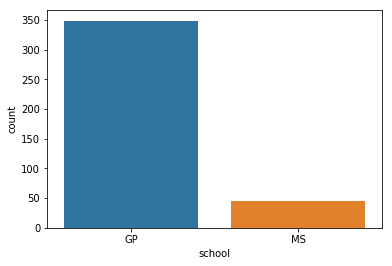

In [31]:
sns.countplot(x='school', data=du)

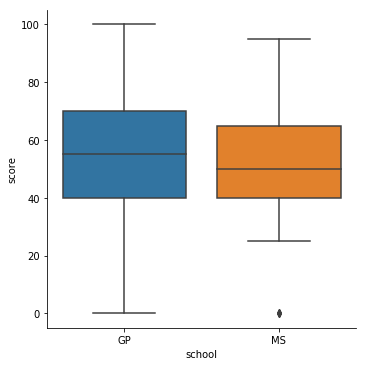

In [39]:
sns.catplot(x='school', y='score', kind="box", data=du)

### 2 sex — пол ученика ('F' - женский, 'M' - мужской)
#### Девушек немного больше чем юношей, пропуски в этих данных отсутствуют, верхняя граница оценок Q3 юношей  выше чем  девушек, но медианное значение одинаково


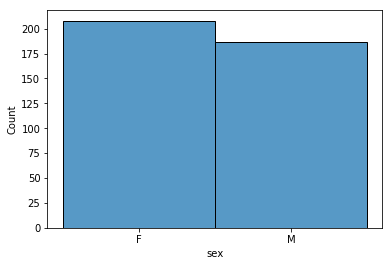

In [44]:
sns.histplot(x='sex', data=du)

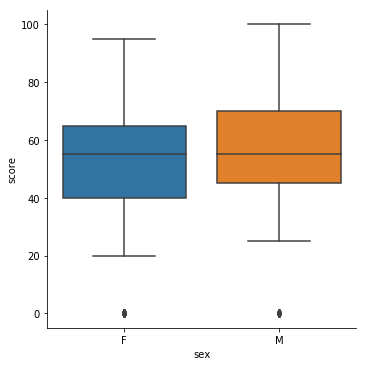

In [42]:
sns.catplot(x='sex', y='score', kind="box", data=du)

### 3 age — возраст ученика (от 15 до 22)
#### Основной возраст учеников -больше 16-ти и 17-летних  учеников, затем 15-ти и 18 летних, немного 19 летних и штучное количество в возрасте 20-22 лет. При этом у 20 летних учеников лучшая успеваемость, остальные возрастные ученики учатся хуже всех. Также, успеваемость начинает снижаться с 17 до 19 лет. 

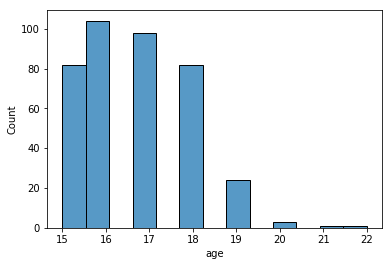

In [45]:
sns.histplot(x='age', data=du)

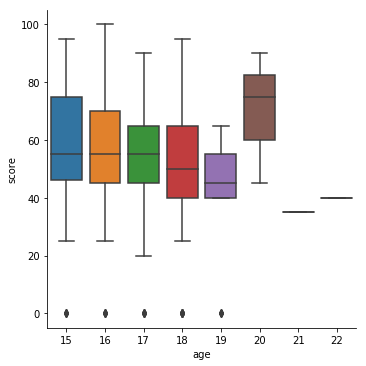

In [46]:
sns.catplot(x='age', y='score', kind="box", data=du)

### 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
#### с городским проживанием большее число,в оценках значение верхней границы квартиля у горожан превышает значение сельских жителей .

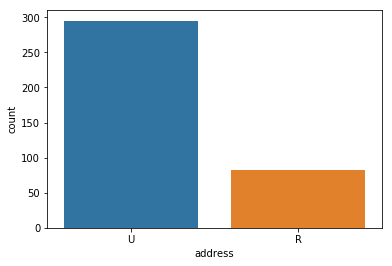

In [60]:
sns.countplot(x='address', data=du)

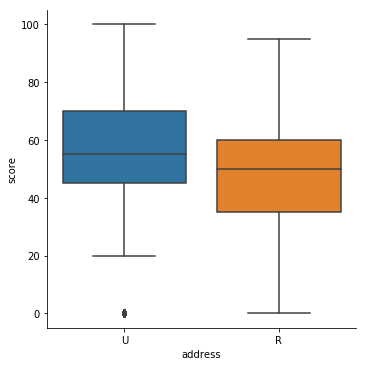

In [58]:
sns.catplot(x='address', y='score', kind="box", data=du)

### 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
#### Какая-то значимая зависимость не прослеживается

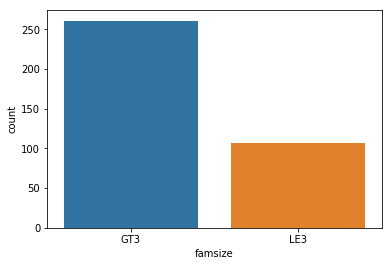

In [62]:
sns.countplot(x='famsize', data=du)

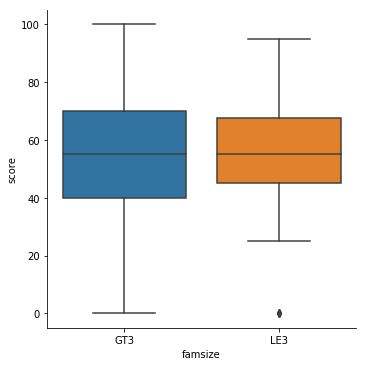

In [61]:
sns.catplot(x='famsize', y='score', kind="box", data=du)

### 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
#### Большее количество родителей проживает совместно, медианное значение успеваемости обоих групп одинаково, границы IQR меньшей группы соответственно меньше

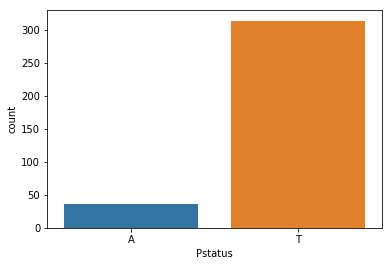

In [65]:
sns.countplot(x='Pstatus', data=du)

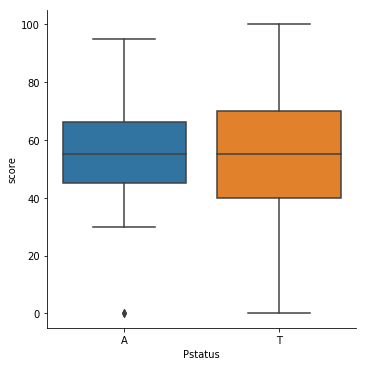

In [64]:
sns.catplot(x='Pstatus', y='score', kind="box", data=du)

### 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#### Больше матерей с высшим образованием,оно действительно влияет на высокие балы. У группы из 3 учеников с 0 образованием  матери при этом высокие балы

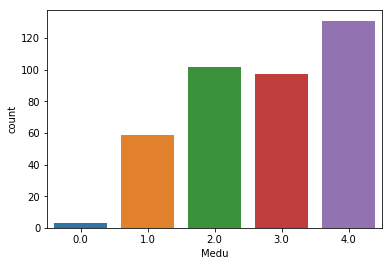

In [112]:
sns.countplot(x='Medu', data=du)

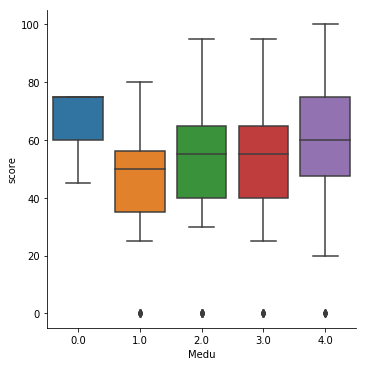

In [111]:
sns.catplot(x='Medu', y='score', kind="box", data=du)

In [115]:
du.query('Medu  == 0')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
127,GP,F,19,U,GT3,T,0.0,1.0,at_home,other,course,other,1.0,2.0,3.0,no,NaN,no,no,no,-6.0,no,no,no,3.0,4.0,2.0,5.0,2.0,45.0
249,GP,M,16,U,GT3,T,0.0,2.0,other,other,other,mother,1.0,1.0,0.0,no,no,yes,no,NaN,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
324,GP,F,17,U,LE3,T,0.0,2.0,at_home,at_home,home,father,2.0,3.0,0.0,no,no,no,no,yes,-9.0,yes,yes,no,3.0,3.0,3.0,2.0,0.0,75.0


### 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#### Образование отца  влияет на балы по математике, у учеников отцов со средним и высшим образованием они близки, отцы со средним образованием составляют большинство, связь успеваемости учеников со средним спец. и начальным образованием прямопропорциональна. Дети отцов без образования имеют вполне высокие балы. Есть одно значение с ошибкой за пределами значений


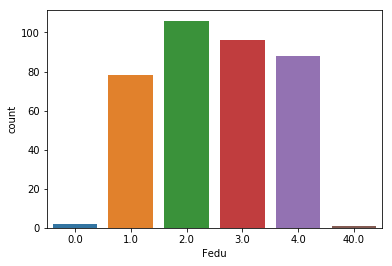

In [116]:
sns.countplot(x='Fedu', data=du)

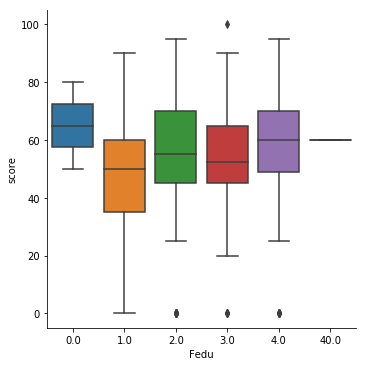

In [118]:
sns.catplot(x='Fedu', y='score', kind="box", data=du)

In [121]:
du.query('Fedu  == 0')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
76,GP,M,15,U,NaN,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,-12.0,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
171,GP,M,16,U,GT3,T,1.0,0.0,other,other,reputation,mother,2.0,2.0,NaN,no,yes,yes,yes,yes,-6.0,NaN,yes,yes,4.0,3.0,2.0,3.0,2.0,80.0


#### 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
#### Наибольшая группа с работой другое, в лидерах по успеваемости дети врачей, также учителей и госсужащих


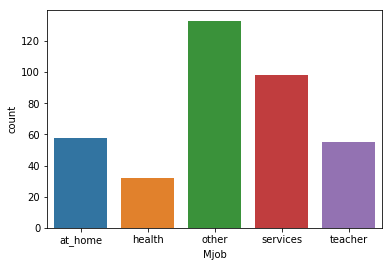

In [122]:
sns.countplot(x='Mjob', data=du)

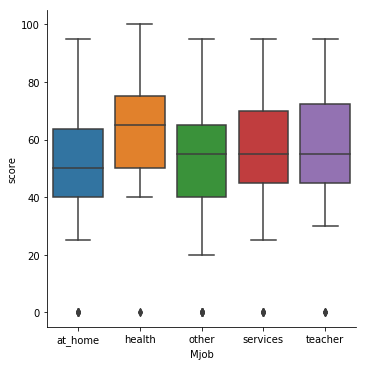

In [123]:
sns.catplot(x='Mjob', y='score', kind="box", data=du)

### 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
#### Основной род занятий  отцов -группа другое, наибольшее влияние на успеваемость детей оказывают отцы учителя, врачи и ...домохозяева


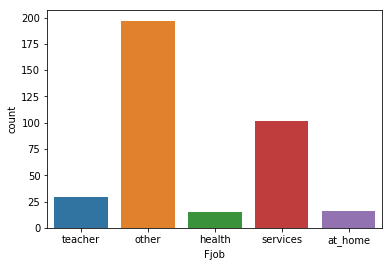

In [125]:
sns.countplot(x='Fjob', data=du)

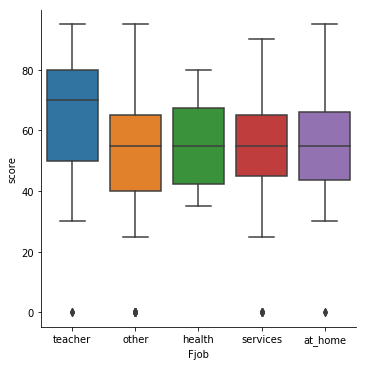

In [126]:
sns.catplot(x='Fjob', y='score', kind="box", data=du)

In [129]:
du[(du.Fjob == 'at_home')]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,-6.0,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
58,GP,M,15,U,LE3,T,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
99,GP,F,16,U,GT3,T,4.0,3.0,other,at_home,course,mother,1.0,3.0,0.0,yes,yes,yes,NaN,yes,-9.0,yes,yes,no,5.0,3.0,5.0,3.0,0.0,40.0
143,GP,F,16,U,LE3,T,1.0,1.0,at_home,at_home,course,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,yes,no,3.0,4.0,4.0,1.0,2.0,65.0
153,GP,M,19,U,GT3,NaN,3.0,2.0,services,at_home,home,mother,1.0,1.0,NaN,no,yes,no,no,yes,-3.0,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0
219,GP,F,17,U,GT3,T,2.0,2.0,NaN,at_home,course,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,no,4.0,3.0,3.0,4.0,4.0,50.0
257,GP,M,19,U,LE3,A,4.0,3.0,services,at_home,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,1.0,1.0,12.0,55.0
273,GP,M,17,R,GT3,T,1.0,2.0,at_home,at_home,home,mother,1.0,2.0,0.0,no,yes,yes,yes,no,-6.0,yes,NaN,yes,3.0,5.0,2.0,1.0,2.0,70.0
286,GP,F,18,U,GT3,T,2.0,NaN,at_home,at_home,other,mother,1.0,3.0,0.0,no,yes,yes,no,yes,-9.0,yes,yes,no,4.0,3.0,3.0,2.0,5.0,95.0
292,GP,F,18,NaN,LE3,T,2.0,1.0,services,at_home,reputation,mother,1.0,2.0,1.0,no,NaN,no,no,yes,-6.0,yes,yes,yes,5.0,4.0,3.0,5.0,12.0,65.0


### 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
#### Лучшие балы получили выбравшие школу по репутации и по близости к дому



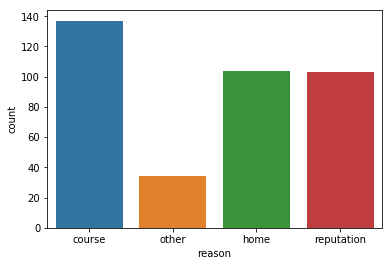

In [131]:
sns.countplot(x='reason', data=du)

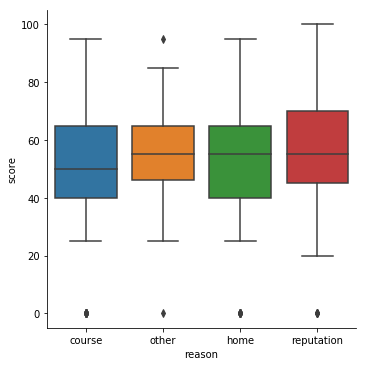

In [200]:
sns.catplot(x='reason', y='score', kind="box", data=du)

### 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
#### Здесь мать -самая многочисленная группа, она же оказывает большее влияние  на успеваемость, но т.к. медианное значение с опекуном отец одинаковое, возможно м/у ними нет различий. А вот балы детей с опекунами не родителями гораздо ниже



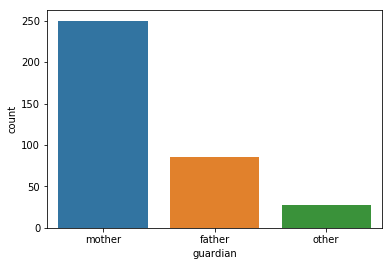

In [134]:
sns.countplot(x='guardian', data=du)

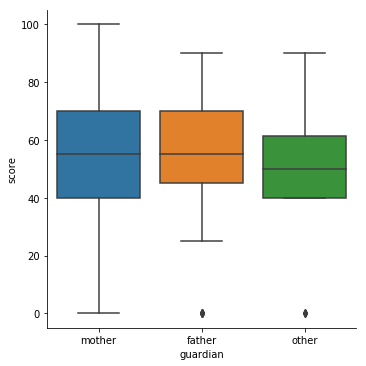

In [135]:
sns.catplot(x='guardian', y='score', kind="box", data=du)

### 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
#### этот параметр оказывает прямое влияние на успеваемотсь



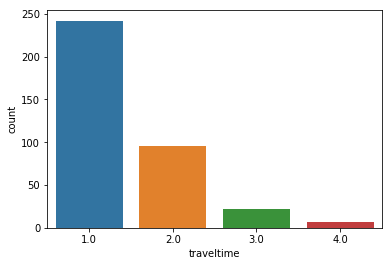

In [137]:
sns.countplot(x='traveltime', data=du)

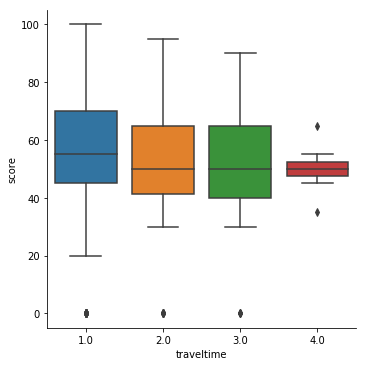

In [138]:
sns.catplot(x='traveltime', y='score', kind="box", data=du)

#### 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
#### подтверждение известного факта что обучение где-либо чему-либо помимо школы поднимает общую успеваемость



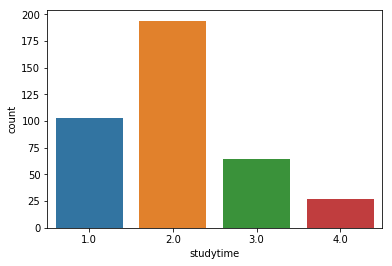

In [139]:
sns.countplot(x='studytime', data=du)

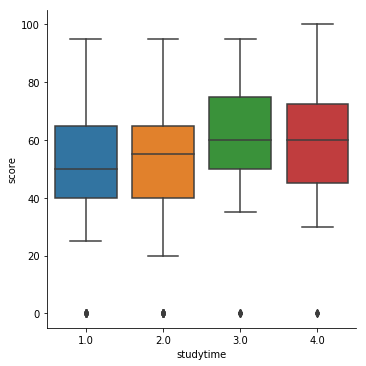

In [140]:
sns.catplot(x='studytime', y='score', kind="box", data=du)

### 15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
#### Вообще непонятно что это за термин, но зависимость прослеживается обратная - при их отсутствии или единичном количестве ученики имеют высокие балы




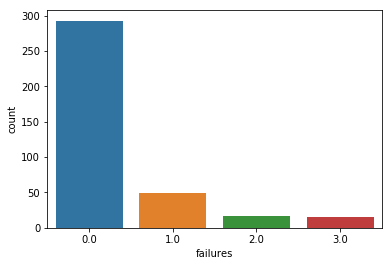

In [141]:
sns.countplot(x='failures', data=du)

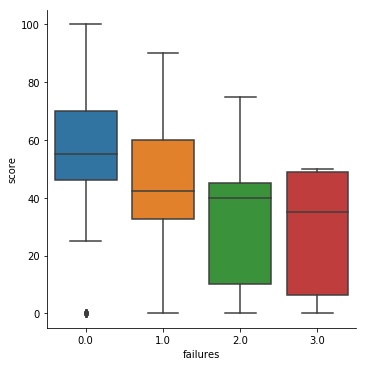

In [142]:
sns.catplot(x='failures', y='score', kind="box", data=du)

### 16 schoolsup — дополнительная образовательная поддержка (yes или no)
#### Влияние доп.поддержки скорее всего  никак не отражается на высоких балах  



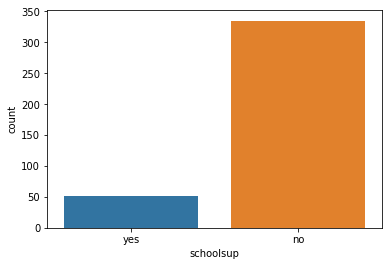

In [144]:
sns.countplot(x='schoolsup', data=du)

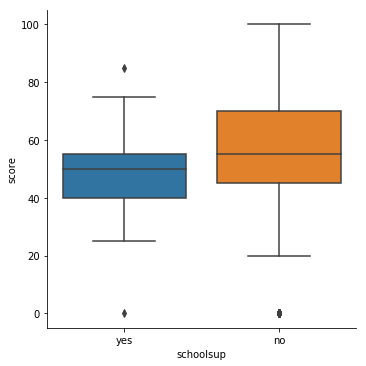

In [143]:
sns.catplot(x='schoolsup', y='score', kind="box", data=du)

### 17 famsup — семейная образовательная поддержка (yes или no)
#### Её имеют большая доля учеников, возможно поэтому граница верхнего квартиля выше,
#### но медианные значения обоих групп равны и у самостоятельных учеников размах смещён в сторону высоких баллов по сравнению с гр. yes



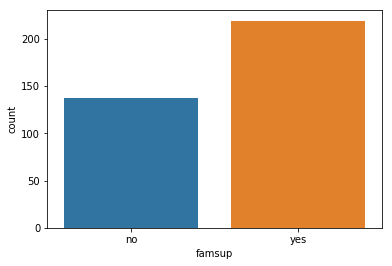

In [145]:
sns.countplot(x='famsup', data=du)

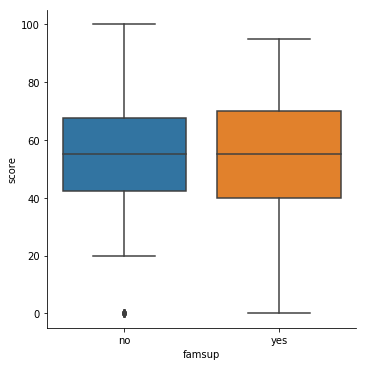

In [146]:
sns.catplot(x='famsup', y='score', kind="box", data=du)

### 18 paid — дополнительные платные занятия по математике (yes или no)
#### из  приведенных графиков не очевидно что доп.занятия не сильно помогли ученикам, нижняя граница усов выше, но медиана и верхняя граница верхнего квартиля одинаковые



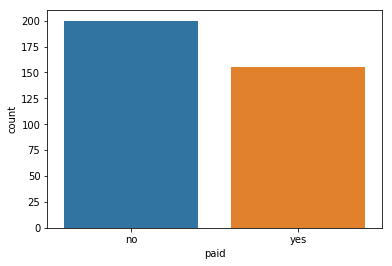

In [201]:
sns.countplot(x='paid', data=du)

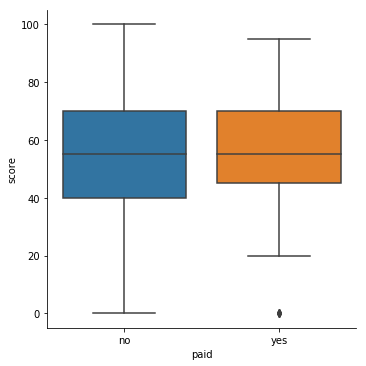

In [148]:
sns.catplot(x='paid', y='score', kind="box", data=du)

### 19 activities — дополнительные внеучебные занятия (yes или no)
#### наличие иных занятий напрямую увеличило успеваемость



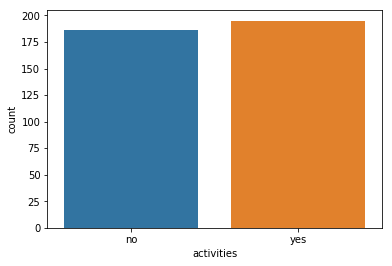

In [151]:
sns.countplot(x='activities', data=du)

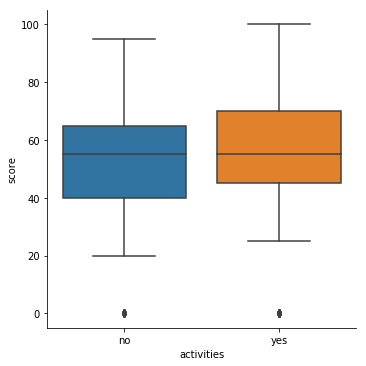

In [152]:
sns.catplot(x='activities', y='score', kind="box", data=du)

### 20 nursery — посещал детский сад (yes или no)
#### Посещение д.сада  незначительно улучшает успеваемость, либо большая ч


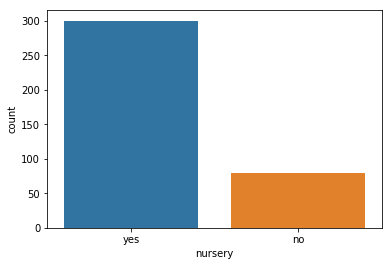

In [153]:
sns.countplot(x='nursery', data=du)

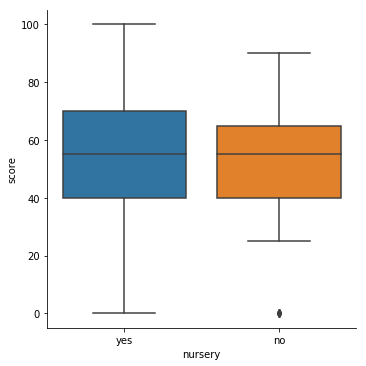

In [154]:
sns.catplot(x='nursery', y='score', kind="box", data=du)

### 21 higher — хочет получить высшее образование (yes или no)
#### прямая связь с успеваемостью и желанием повышать ур-нь образования


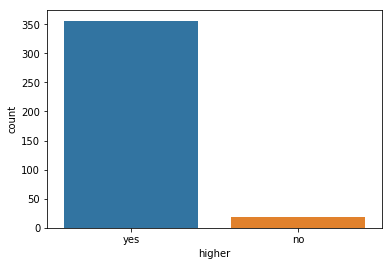

In [157]:
sns.countplot(x='higher', data=du)

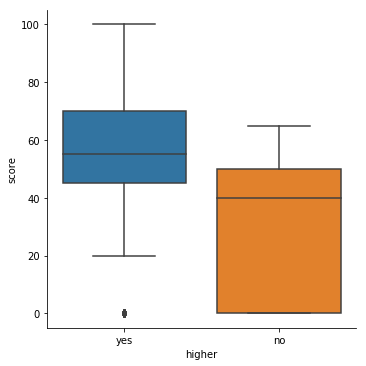

In [155]:
sns.catplot(x='higher', y='score', kind="box", data=du)

### 22 internet — наличие интернета дома (yes или no)

#### Интернет повышает  возможности в обучении и повышает успеваемость

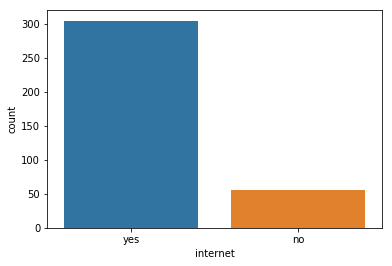

In [158]:
sns.countplot(x='internet', data=du)

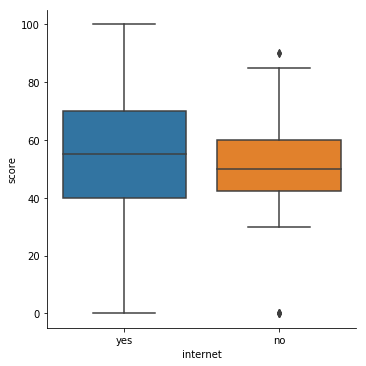

In [159]:
sns.catplot(x='internet', y='score', kind="box", data=du)

### 23 romantic — в романтических отношениях (yes или no)
#### наличие romantic отвлекает от учёбы и  снижает успеваемость



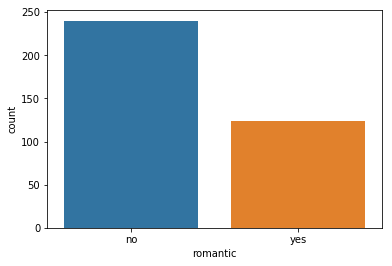

In [160]:
sns.countplot(x='romantic', data=du)

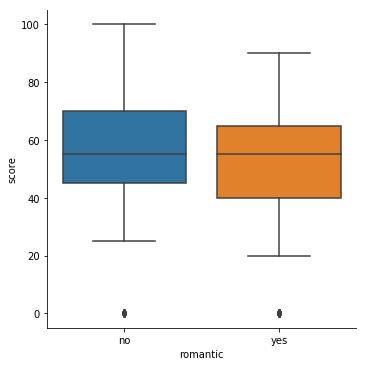

In [161]:
sns.catplot(x='romantic', y='score', kind="box", data=du)

### 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
#### есть ошибки в заполнении данных, очень странные результаты в группе с 2-наибольший IQR,смещён  сторону высоких баллов, много, в основном в благополучных отношениях наиболее высокая успеваемость



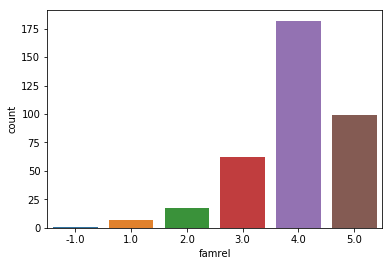

In [164]:
sns.countplot(x='famrel', data=du)

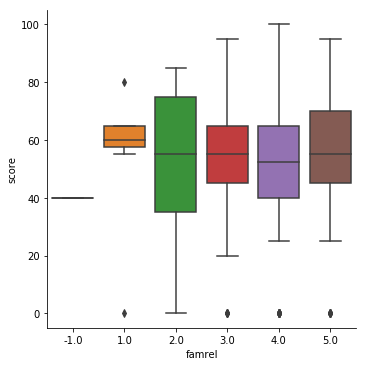

In [165]:
sns.catplot(x='famrel', y='score', kind="box", data=du)

In [167]:
du[(du.famrel == 2)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
27,GP,M,15,U,GT3,T,4.0,2.0,health,services,other,mother,1.0,1.0,0.0,NaN,no,yes,no,yes,-3.0,yes,yes,NaN,2.0,2.0,4.0,1.0,4.0,75.0
37,GP,M,16,R,GT3,A,4.0,4.0,other,teacher,reputation,mother,NaN,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
60,GP,F,16,R,GT3,T,4.0,4.0,health,teacher,other,NaN,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0
79,GP,F,16,U,NaN,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,-6.0,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
141,GP,M,16,U,LE3,T,2.0,2.0,services,services,reputation,father,2.0,1.0,2.0,no,yes,no,NaN,yes,-3.0,yes,NaN,no,2.0,3.0,3.0,2.0,8.0,45.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,-3.0,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
156,GP,M,17,R,LE3,T,1.0,2.0,NaN,other,reputation,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,no,no,2.0,2.0,2.0,5.0,8.0,65.0
206,GP,F,16,U,GT3,A,3.0,1.0,services,other,course,mother,1.0,2.0,3.0,no,yes,yes,no,yes,-6.0,yes,yes,no,2.0,3.0,3.0,4.0,5.0,35.0


### 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
#### похоже, что малозанятые ученики лучше отдыхают,больше готовятся и имеют высокие баллы. Но,возможно эти результаты из-за малочисленности очень занятых учеников



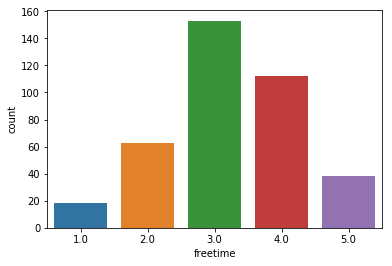

In [169]:
sns.countplot(x='freetime', data=du)

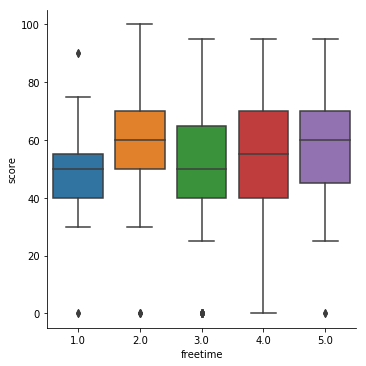

In [168]:
sns.catplot(x='freetime', y='score', kind="box", data=du)

In [171]:
du[(du.freetime == 5)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
14,GP,M,15,U,GT3,A,2.0,2.0,other,other,home,other,1.0,3.0,0.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,5.0,2.0,3.0,0.0,80.0
18,GP,M,17,U,GT3,T,3.0,2.0,services,services,course,mother,1.0,1.0,3.0,no,yes,NaN,yes,yes,-3.0,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,-6.0,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,NaN,1.0,0.0,NaN,yes,no,yes,yes,-3.0,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
61,GP,F,16,U,GT3,T,1.0,1.0,services,services,course,father,4.0,1.0,0.0,yes,NaN,no,yes,no,-3.0,yes,yes,yes,5.0,5.0,5.0,5.0,6.0,55.0
78,GP,M,17,U,NaN,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,NaN,no,yes,yes,-3.0,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
100,GP,M,16,U,GT3,T,4.0,4.0,services,services,other,mother,1.0,1.0,0.0,yes,yes,yes,yes,yes,-3.0,yes,yes,no,4.0,5.0,5.0,4.0,14.0,25.0


### 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
#### Очевидно, параметр имеет влияние на успеваемость, в умеренных дозах времяпрепровождение с друзьми способно положительно влиять на высокие баллы



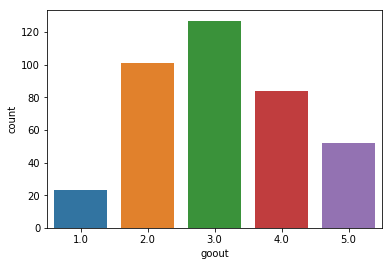

In [173]:
sns.countplot(x='goout', data=du)

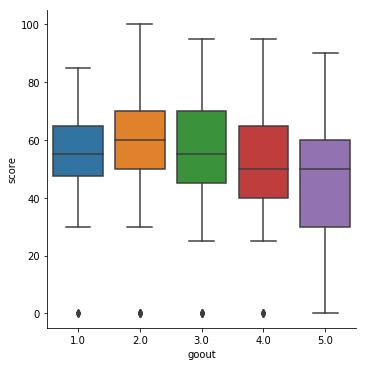

In [174]:
sns.catplot(x='goout', y='score', kind="box", data=du)

### 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
#### Радует,что у большинства опрошенных очень хорошо со здоровьем, но его состояние не оказывает прямого влияния на высокие баллы

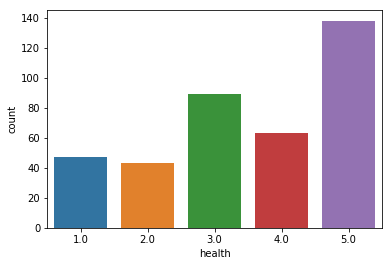

In [175]:
sns.countplot(x='health', data=du)

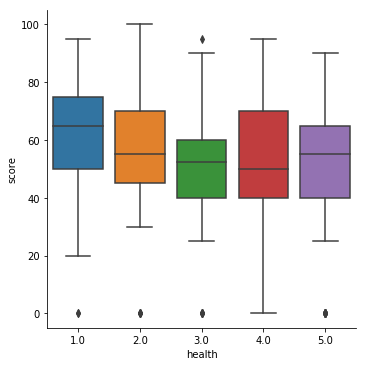

In [176]:
sns.catplot(x='health', y='score', kind="box", data=du)

### 28 absences — количество пропущенных занятий
#### влияние количества пропусковна полученный балл не наблюдается


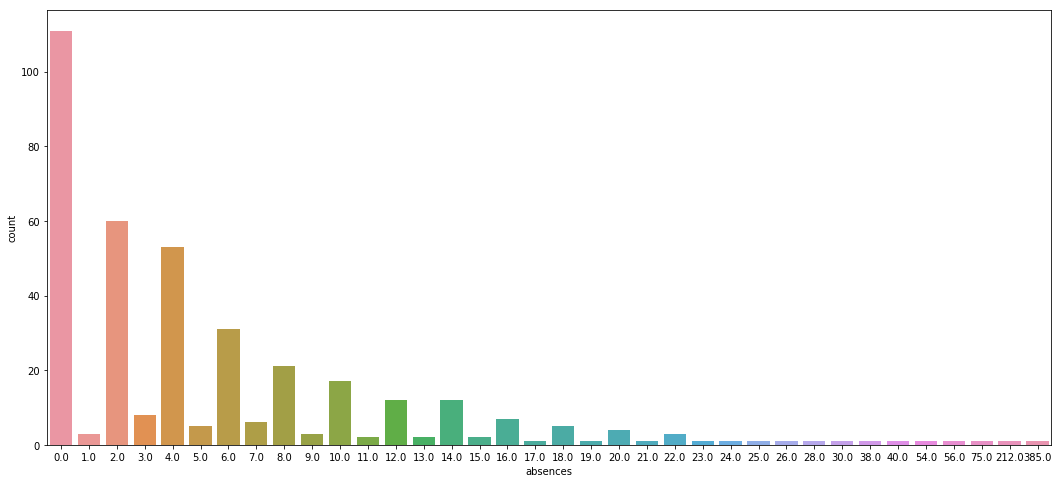

In [184]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.countplot(x='absences', data=du)

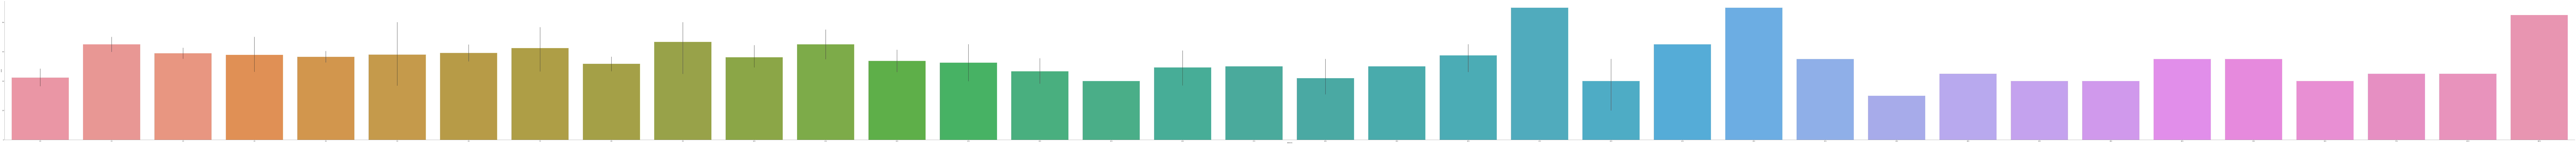

In [194]:
sns.catplot(x='absences', y='score', kind="bar",
            data=du, height=18, aspect=18, )

### 29 score — баллы по госэкзамену по математике

In [ ]:
sns.countplot(x='Medu', data=du)

In [ ]:
sns.catplot(x='Medu', y='score', kind="box", data=du)

### studytime учебное время
#### Непонятно что означают  группы внутри параметра, но у групп 3,4 высокие баллы, скорее нужно учесть

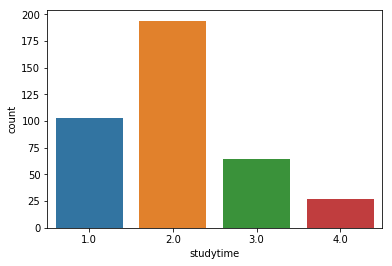

In [195]:
sns.countplot(x='studytime', data=du)

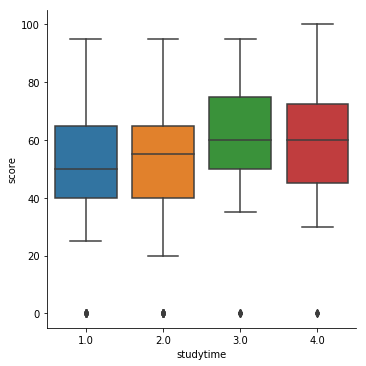

In [196]:
sns.catplot(x='studytime', y='score', kind="box", data=du)

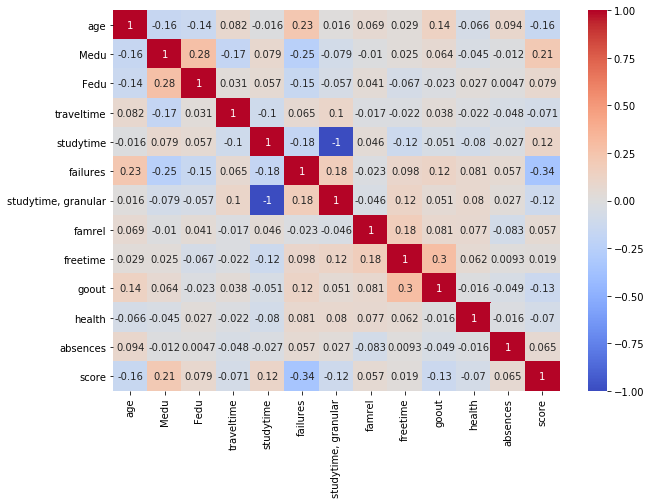

In [63]:
correlation = du.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation, annot=True, cmap='coolwarm')